# Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Cleaning

In [2]:
df1 = pd.read_csv('C:/Users/ishan/Documents/Data Science Projects/Data Science/Machine Learning/Real_estate_Project/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [4]:
df1['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Emstael     1
Chaldi      1
Jaise P     1
Grterrr     1
ThhtsV      1
Name: society, Length: 2688, dtype: int64

In [5]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df1.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df1.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [8]:
df1.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

<AxesSubplot:xlabel='balcony', ylabel='price'>

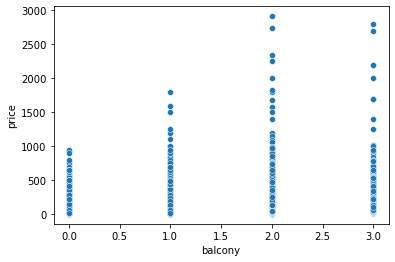

In [9]:
sns.scatterplot(x ='balcony', y = 'price', data = df1)

<AxesSubplot:xlabel='balcony', ylabel='price'>

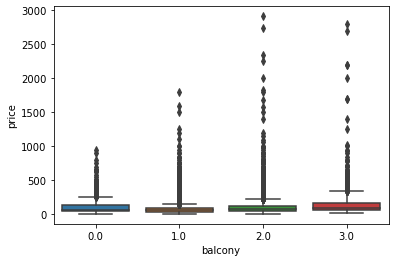

In [10]:
sns.boxplot(x ='balcony', y = 'price', data = df1)

In [11]:
mean_by_bal = df4.groupby('balcony')['total_sqft'].mean()
mean_by_bal

NameError: name 'df4' is not defined

In [ ]:
median_by_bal = df4.groupby('balcony')['total_sqft'].median()
median_by_bal

In [ ]:
mean_by_balcony = df1.groupby('balcony')['price'].mean()
mean_by_balcony

In [ ]:
median_by_balcony = df1.groupby('balcony')['price'].median()
median_by_balcony

In [ ]:
std_by_balcony = df1.groupby('balcony')['price'].std()
std_by_balcony

In [ ]:
df1.balcony.fillna(-1,inplace=True)

In [ ]:
df1[df1.balcony ==-1]

In [ ]:
sns.scatterplot(x ='bath', y = 'price', data = df1)

In [ ]:
sns.scatterplot(x ='area_type', y = 'price', data = df1)

In [ ]:
sns.boxplot(x ='area_type', y = 'price', data = df1)

In [ ]:
mean_by_area = df1.groupby('area_type')['price'].mean()
mean_by_area

In [ ]:
median_by_area = df1.groupby('area_type')['price'].median()
median_by_area

In [ ]:
count_by_area = df1.groupby('area_type')['price'].count()
count_by_area

In [ ]:
# We are going to give rating from 1 to 5 to the different area types based on the mean price

dict_area = {'Built-up  Area':3,'Carpet  Area':1,'Plot  Area':5,'Super built-up  Area':2} 
df1['area_type'].replace(dict_area, inplace = True)
df1.head()

In [ ]:
df1.area_type.value_counts()

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(x ='availability', y = 'price', data = df1)


In [ ]:
mean = df1.groupby('availability')['price'].mean().sort_values(ascending = False)
mean

In [ ]:
df2 = df1.drop(['availability','society'], axis= 1) 
df2.head()

In [ ]:
df2.corr()['price']

In [ ]:
df2.isnull().sum()

In [ ]:
df3 = df2.dropna()                  #Suggestion - Analyze by imputing missing values
df3.isnull().sum()

In [ ]:
df3.head()

In [ ]:
pd.DataFrame(df3['total_sqft'].unique()).tail(50)

In [ ]:
def get_sqfeet(col):
    x = col.split('-')
    if len(x)==2:
        return((float(x[0]) + float(x[1]))/2)
    try:
        return float(col)
    except:
        return np.nan
    

In [ ]:
print(get_sqfeet('1234'))

In [ ]:
df4 = df3.copy()

In [ ]:
df4['total_sqft'] = df4['total_sqft'].apply(get_sqfeet)

In [ ]:
df4.isnull().sum()

In [ ]:
df4.shape,df3.shape

In [ ]:
df4.head()

In [ ]:
df4['bhk'] = df4['size'].apply(lambda x : int(x.split(' ')[0]))
df4.head()

In [ ]:
sns.scatterplot(df4.bhk,df4.balcony)

In [ ]:
sns.scatterplot(df4.bath,df4.balcony)

In [ ]:
sns.boxplot( x= df4.balcony , y = df4.total_sqft, data = df4)

In [ ]:
sns.boxplot( x= df4.balcony , y = df4.price, data = df4)

In [ ]:
mean_balcony_by_bhk = df4.groupby('bhk')['balcony'].mean()

In [ ]:
mean_balcony_by_bhk

In [ ]:
df4['bhk'].unique()

In [ ]:
df4[df4.bhk > 20].head()

In [ ]:
df5 = df4.copy()

In [ ]:
df5['price_per_sqft'] = df5['price']* 100000/df5['total_sqft']
df5.head()

In [ ]:
len(df5['location'].unique())

In [ ]:
df5.location = df5.location.apply(lambda x : x.strip())

In [ ]:
location_count = df5.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_count

In [ ]:
len(location_count[location_count<= 10])

In [ ]:
location_less_than_10 = location_count[location_count<= 10]

In [ ]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_less_than_10 else x)

In [ ]:
len(df5['location'].unique())

In [ ]:
df5.head()

In [ ]:
df = df5[~(df5.total_sqft/df5.bhk  < 350)]
df6 = df[df.price_per_sqft  > 2800]
df6.head()

In [ ]:
df6[df6.bhk > 10]

In [ ]:
df6.price_per_sqft.describe()

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape
    
    
    

In [ ]:
df7.head()

In [ ]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

In [ ]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>10]

In [ ]:
df8[df8.bath>df8.bhk+2]

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

In [ ]:
df9.head(2)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

In [ ]:

df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

In [ ]:
df12.shape

In [ ]:
df12.corr()['price'].sort_values(ascending = False)

In [ ]:
X = df12.drop(['price'],axis='columns')

X.head(3)

In [ ]:
X.shape

In [ ]:

y = df12.price
y.head(3)

In [ ]:
df12.corr()['price']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [ ]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X,y)

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Mysore Road',1000, 2, 2)

In [ ]:
predict_price('1st Phase JP Nagar',1080, 3, 3)

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))